In [1]:
import pdfplumber
import re
from collections import OrderedDict

In [2]:
pdf_market = pdfplumber.open("Market_Report.pdf")

In [4]:
p0 =pdf_market.pages[0]

In [5]:
im =p0.to_image()
print(im)

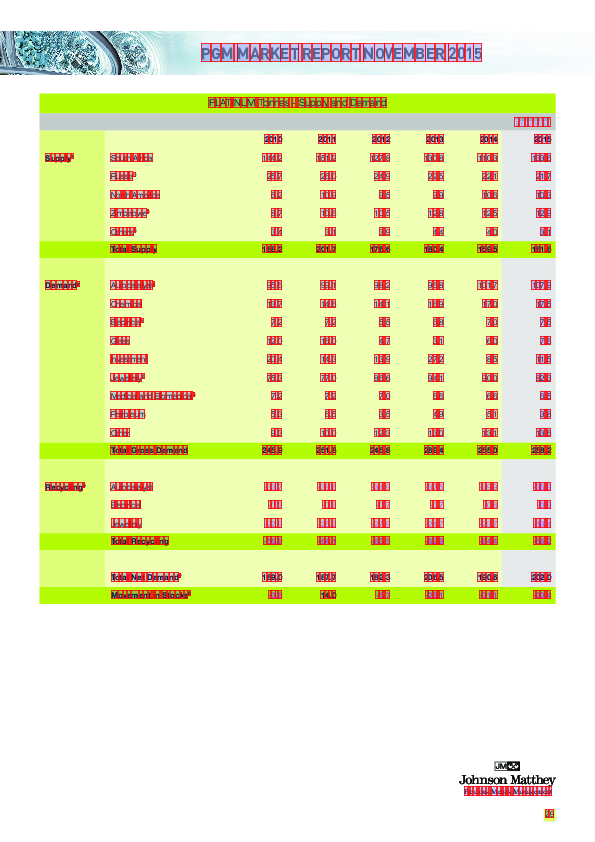

In [6]:
im.reset().draw_rects(p0.chars)

In [215]:
text = p0.extract_text()
print(text)

PGM MARKET REPORT NOVEMBER 2015
PLATINUM Tonnes - Supply and Demand
Forecast
2010 2011 2012 2013 2014 2015
Supply1 South Africa 144.2 151.2 127.8 130.8 110.3 133.6
Russia2 25.7 26.0 24.9 22.5 22.1 21.7
North America 6.2 10.9 9.5 9.9 10.6 10.3
Zimbabwe3 8.7 10.6 10.5 12.8 12.5 12.9
Others3 3.4 3.1 3.9 4.4 4.0 3.1
Total Supply 188.2 201.7 176.6 180.4 159.5 181.6
Demand4 Autocatalyst4 95.6 99.1 98.2 96.8 101.7 107.9
Chemical 13.7 14.6 14.1 16.9 17.0 17.5
Electrical4 7.2 7.2 5.5 6.8 7.0 7.5
Glass 12.0 16.0 4.7 3.1 6.0 7.6
Investment 20.4 14.3 13.9 27.2 8.5 11.5
Jewellery4 75.3 77.0 86.6 94.1 90.0 82.3
Medical and Biomedical5 7.2 7.2 7.0 6.6 6.6 6.5
Petroleum 5.3 6.5 3.5 4.9 5.1 3.8
Other 9.3 10.0 12.3 13.0 13.1 13.6
Total Gross Demand 245.9 251.8 245.8 269.4 255.0 258.2
Recycling6 Autocatalyst -33.7 -38.6 -34.9 -37.5 -39.9 -35.9
Electrical -0.3 -0.3 -0.7 -0.7 -0.8 -0.9
Jewellery -22.9 -25.2 -27.9 -24.7 -23.7 -19.4
Total Recycling -56.9 -64.1 -63.5 -62.9 -64.4 -56.2
Total Net Demand7 189.0 

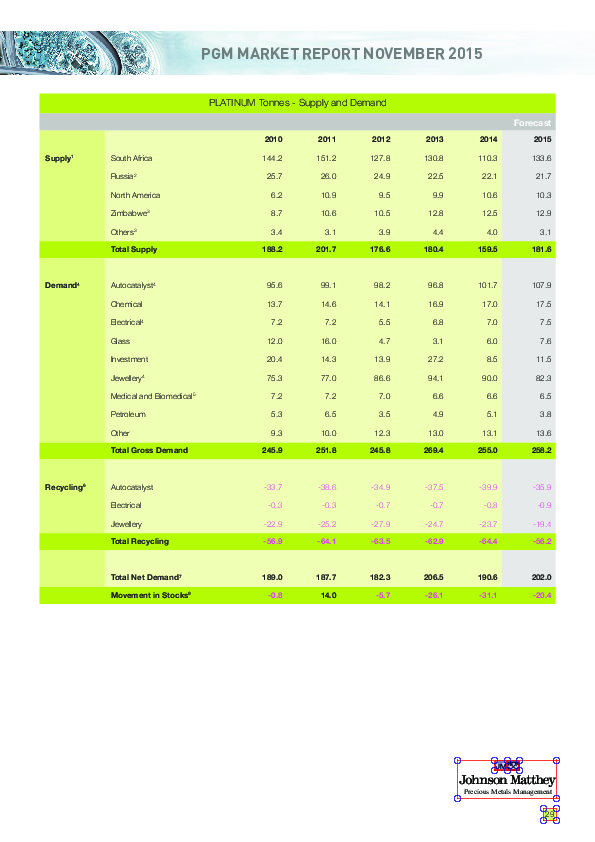

In [216]:
im.reset().debug_tablefinder()

In [217]:
table_settings = {
    "vertical_strategy": "lines",
    "horizontal_strategy": "text",
    "intersection_x_tolerance": 15
}

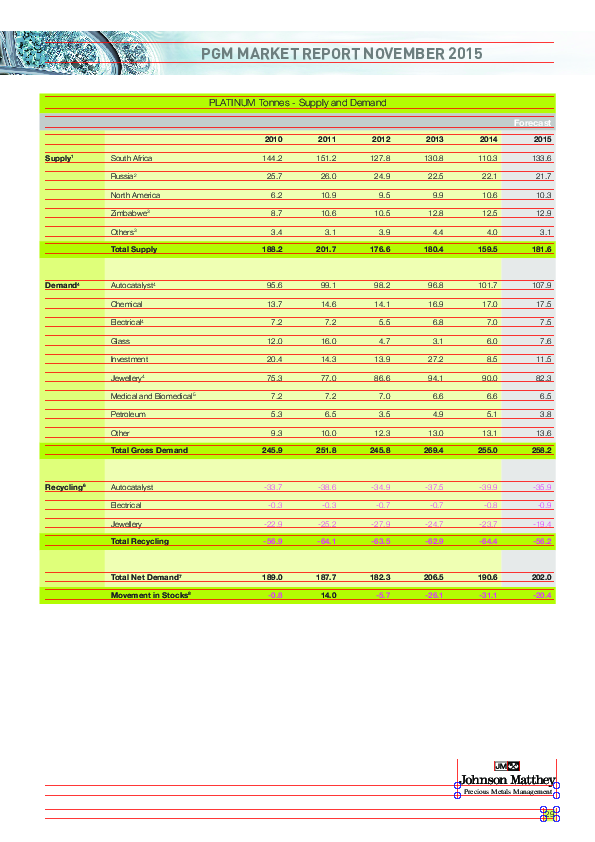

In [218]:
im.reset().debug_tablefinder(table_settings)

In [219]:
table1 = p0.extract_table()
print(table1)

[['', '']]


In [18]:
import pandas as pd
df =pd.DataFrame(table1)

In [19]:
print(df)

  0 1
0    


In [220]:
from tabula import read_pdf
from tabula import convert_into
#tab_df = read_pdf("etf_brochure1.pdf",pages="1-2")

new_dd= read_pdf("Market_Report.pdf",pages="1-2-3",output_format="json")
print(new_dd)
#print(tab_df.loc[[:,5]])
# convert_into("etf_brochure1.pdf","test.json",output_format="json")
# !cat test.json
convert_into("Market_Report.pdf","test.csv",pages="1",output_format="csv")
#!cat test.csv




[{'extraction_method': 'stream', 'top': 0.0, 'left': 0.0, 'width': 551.5900268554688, 'height': 597.5900268554688, 'data': [[{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 49.01, 'left': 201.5, 'width': 280.7300109863281, 'height': 9.770000457763672, 'text': 'PGM MARKET REPORT NOVEMBER 2015'}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}], [{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 100.14, 'left': 208.52, 'width': 178.239990234375, 'height': 6.21999979019165, 'text': 'PLATINUM Tonnes - Supply and Demand'}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}], [{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}, {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text'

In [232]:
new_dt= read_pdf("Market_Report.pdf",pages="all")
print(new_dt)

# print re.split(r'(?<=[.])(?<!\d.)\s',new_dt[["PGM MARKET REPORT NOVEMBER 2015"]])

SyntaxError: invalid syntax (<ipython-input-232-d11d70b66326>, line 4)

In [237]:
datarow = new_test.iloc[1:,0:1].astype(str)
print(datarow)
#print(re.split(":?.", entry, 4) for entry in datarow)
#print(re.split(r'(?<=[.])(?<!\d.)\s',datarow))
#print re.split(r'(?<=[,.])(?<!\d.)\s', text)
#print(datarow.split('.'))
print(type(datarow))
#datarow01= [x.split('::')[0] for x in datarow]
#print(datarow01)

#datarow[['2010','2011','2012','2013','2014']] = datarow['PGM MARKET REPORT NOVEMBER 2015'].str.split(',\s+', expand=True)
#print(datarow)
#print(datarow.str.split('.',expand=True))


print(re.split(r'(?<=[.])(?<!\d.)\s',datarow))

print(re.findall(r'(?:\d[,.]|[^,.])*(?:[,.]|$)',datarow))

    PGM MARKET REPORT NOVEMBER 2015
3         144.2151.2127.8130.8110.3
4              25.726.024.922.522.1
5                 6.210.99.59.910.6
6               8.710.610.512.812.5
7                   3.43.13.94.44.0
8         188.2201.7176.6180.4159.5
9             95.699.198.296.8101.7
10             13.714.614.116.917.0
11                  7.27.25.56.87.0
12                12.016.04.73.16.0
13              20.414.313.927.28.5
14             75.377.086.694.190.0
15                  7.27.27.06.66.6
16                  5.36.53.54.95.1
17              9.310.012.313.013.1
18        245.9251.8245.8269.4255.0
19        -33.7-38.6-34.9-37.5-39.9
20             -0.3-0.3-0.7-0.7-0.8
21        -22.9-25.2-27.9-24.7-23.7
22        -56.9-64.1-63.5-62.9-64.4
23        189.0187.7182.3206.5190.6
24           -0.814.0-5.7-26.1-31.1
25      PGMMARKETREPORTNOVEMBER2015
26  PALLADIUMTonnes-SupplyandDemand
27                              nan
28             20102011201220132014
29             82.179.673.47

TypeError: expected string or bytes-like object

In [214]:
new_test["Year1"], new_test["Year2"],new_test["Year3"],new_test["Year4"],new_test["Year5"] = list(zip(*new_test["PGM MARKET REPORT NOVEMBER 2015"].str.split().tolist()))
print(datarow.str.split('.',1))


#del df["row"]  

TypeError: zip argument #26 must support iteration

In [149]:
years=""
years = new_test.iloc[:1,:1]
print (years)
print(type(years))

  PGM MARKET REPORT NOVEMBER 2015
2            20102011201220132014
<class 'pandas.core.frame.DataFrame'>


In [156]:
years['PGM MARKET REPORT NOVEMBER 2015'] = years['PGM MARKET REPORT NOVEMBER 2015'].astype(str)
print(type(years))
print (years)

<class 'pandas.core.frame.DataFrame'>
  PGM MARKET REPORT NOVEMBER 2015
2            20102011201220132014


In [101]:
print(new_test.columns[0])

PGM MARKET REPORT NOVEMBER 2015


In [102]:
new_test= pd.DataFrame(new_test.columns[0].str.split(' ',1).tolist(),columns = ['Year1','Year2','Year3','Year4','Year5'])


AttributeError: 'str' object has no attribute 'str'

In [103]:
    Unnamed: 0               Unnamed: 1       PGM MARKET REPORT NOVEMBER 2015  \
0          NaN                      NaN   PLATINUM Tonnes - Supply and Demand   
1          NaN                      NaN                                   NaN   
2          NaN                      NaN              2010 2011 2012 2013 2014   
3      Supply1             South Africa         144.2 151.2 127.8 130.8 110.3   
4          NaN                  Russia2              25.7 26.0 24.9 22.5 22.1   
5          NaN            North America                 6.2 10.9 9.5 9.9 10.6   
6          NaN                Zimbabwe3               8.7 10.6 10.5 12.8 12.5   
7          NaN                  Others3                   3.4 3.1 3.9 4.4 4.0   
8          NaN             Total Supply         188.2 201.7 176.6 180.4 159.5   
9      Demand4            Autocatalyst4             95.6 99.1 98.2 96.8 101.7   
10         NaN                 Chemical              13.7 14.6 14.1 16.9 17.0   
11         NaN              Electrical4                   7.2 7.2 5.5 6.8 7.0   
12         NaN                    Glass                 12.0 16.0 4.7 3.1 6.0   
13         NaN               Investment               20.4 14.3 13.9 27.2 8.5   
14         NaN               Jewellery4              75.3 77.0 86.6 94.1 90.0   
15         NaN  Medical and Biomedical5                   7.2 7.2 7.0 6.6 6.6   
16         NaN                Petroleum                   5.3 6.5 3.5 4.9 5.1   
17         NaN                    Other               9.3 10.0 12.3 13.0 13.1   
18         NaN       Total Gross Demand         245.9 251.8 245.8 269.4 255.0   
19  Recycling6             Autocatalyst         -33.7 -38.6 -34.9 -37.5 -39.9   
20         NaN               Electrical              -0.3 -0.3 -0.7 -0.7 -0.8   
21         NaN                Jewellery         -22.9 -25.2 -27.9 -24.7 -23.7   
22         NaN          Total Recycling         -56.9 -64.1 -63.5 -62.9 -64.4   
23         NaN        Total Net Demand7         189.0 187.7 182.3 206.5 190.6   
24         NaN      Movement in Stocks8            -0.8 14.0 -5.7 -26.1 -31.1

SyntaxError: invalid syntax (<ipython-input-103-58a8dca398a7>, line 1)

In [104]:

new_dt=new_dt.replace(r'[,\"\']','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)
print(new_dt)

    Unnamed: 0             Unnamed: 1  PGM MARKET REPORT NOVEMBER 2015  \
0          NaN                    NaN   PLATINUMTonnes-SupplyandDemand   
1          NaN                    NaN                              NaN   
2          NaN                    NaN             20102011201220132014   
3      Supply1            SouthAfrica        144.2151.2127.8130.8110.3   
4          NaN                Russia2             25.726.024.922.522.1   
5          NaN           NorthAmerica                6.210.99.59.910.6   
6          NaN              Zimbabwe3              8.710.610.512.812.5   
7          NaN                Others3                  3.43.13.94.44.0   
8          NaN            TotalSupply        188.2201.7176.6180.4159.5   
9      Demand4          Autocatalyst4            95.699.198.296.8101.7   
10         NaN               Chemical             13.714.614.116.917.0   
11         NaN            Electrical4                  7.27.25.56.87.0   
12         NaN                  Glass 

In [105]:
print(type(new_dt))
print(new_dt.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Unnamed: 0', 'Unnamed: 1', 'PGM MARKET REPORT NOVEMBER 2015',
       'Unnamed: 3'],
      dtype='object')


In [94]:
columns_names =["Market_Name","Market_Category","Market_Parameters","2010","2011","2012","2013","2014","2015"]
F_df = pd.DataFrame(columns=columns_names)
print(F_df)

Empty DataFrame
Columns: [Market_Name, Market_Category, Market_Parameters, 2010, 2011, 2012, 2013, 2014, 2015]
Index: []


In [95]:
print(new_dt.iloc[:1,0:3])

  Unnamed: 0 Unnamed: 1 PGM MARKET REPORT NOVEMBER 2015
0        NaN        NaN  PLATINUMTonnes-SupplyandDemand
